# COVID-19 in India: What Went So Terribly Wrong?

## Motivation

Recently, India has experienced an increase in COVID-19 cases and deaths. With insufficient medical resources and poor living conditions, many people have to unfortunately be turned away from hospitals in favor of people with more severe cases. But until now, it seemed as if India was doing well with the pandemic! So what has happened recently to change that? In this notebook we will explore that question and investigate which locations within India have it the worst and need medical resources the most.

## Data Source

Download the data for this project from https://covid.ourworldindata.org/data/owid-covid-data.csv.

Because the data contains information about COVID cases from countries all around the world, we need to first filter the data so that we only look at data from India.

In [4]:
import pandas as pd

df = pd.read_csv('covid_india.csv')
df = df[df['location'] == 'India']
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
34932,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
34933,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
34934,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
34935,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
34936,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35383,IND,Asia,India,2021-04-25,17313163.0,352991.0,321622.571,195123.0,2812.0,2336.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35384,IND,Asia,India,2021-04-26,17636186.0,323023.0,330744.857,197894.0,2771.0,2480.571,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35385,IND,Asia,India,2021-04-27,17997113.0,360927.0,340140.429,201187.0,3293.0,2662.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35386,IND,Asia,India,2021-04-28,18376421.0,379308.0,349378.143,204832.0,3645.0,2882.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


Now that we have the appropriate data, we can inspect the data to determine whether there are any missing values.

In [11]:
df.isnull().sum()

iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
new_cases                                  0
new_cases_smoothed                         5
total_deaths                              41
new_deaths                                41
new_deaths_smoothed                        5
total_cases_per_million                    0
new_cases_per_million                      0
new_cases_smoothed_per_million             5
total_deaths_per_million                  41
new_deaths_per_million                    41
new_deaths_smoothed_per_million            5
reproduction_rate                         47
icu_patients                             456
icu_patients_per_million                 456
hosp_patients                            456
hosp_patients_per_million                456
weekly_icu_admissions                    456
weekly_icu

We can see there aren't any values missing for total cases and new cases, but there are some values missing for total deaths and new deaths. There are also many values missing for vaccinations. We need to decide on how to deal with this missing data.

To make this decision, we can look at what percentage of the data is actually missing. If the perecentage is miniscule, then we can safely drop that portion of the data. Otherwise, we will need to fill in the missing values using some technique.

In [12]:
df.isnull().sum() * 100 / len(df)

iso_code                                   0.000000
continent                                  0.000000
location                                   0.000000
date                                       0.000000
total_cases                                0.000000
new_cases                                  0.000000
new_cases_smoothed                         1.096491
total_deaths                               8.991228
new_deaths                                 8.991228
new_deaths_smoothed                        1.096491
total_cases_per_million                    0.000000
new_cases_per_million                      0.000000
new_cases_smoothed_per_million             1.096491
total_deaths_per_million                   8.991228
new_deaths_per_million                     8.991228
new_deaths_smoothed_per_million            1.096491
reproduction_rate                         10.307018
icu_patients                             100.000000
icu_patients_per_million                 100.000000
hosp_patient

We can see that for total deaths and new deaths, the percentage of missing data is not much (about 9%), so we can safely drop those data. However, about 77% of the vaccination-related data is missing, which means we probably need to fill in the data if we are interested in using that data later to answer any questions related to vaccinations.

In [14]:
# Drops missing values in total_deaths and new_deaths columns
df.dropna(subset=['total_deaths', 'new_deaths'], inplace=True)

Now that we have dealt with missing values for deaths (we'll come back to vaccinations later), we can attempt to visualize the number of deaths and cases over time with a line graph.

<AxesSubplot:xlabel='date'>

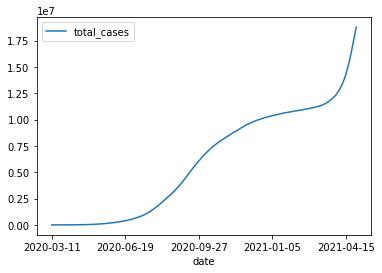

In [25]:
df

In [24]:
df.plot(x='date', y='total_cases')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
34973,IND,Asia,India,2020-03-11,62.0,6.0,4.857,1.0,1.0,0.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
34974,IND,Asia,India,2020-03-12,73.0,11.0,6.143,1.0,0.0,0.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
34975,IND,Asia,India,2020-03-13,82.0,9.0,7.286,2.0,1.0,0.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
34976,IND,Asia,India,2020-03-14,102.0,20.0,9.714,2.0,0.0,0.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
34977,IND,Asia,India,2020-03-15,113.0,11.0,10.571,2.0,0.0,0.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35383,IND,Asia,India,2021-04-25,17313163.0,352991.0,321622.571,195123.0,2812.0,2336.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35384,IND,Asia,India,2021-04-26,17636186.0,323023.0,330744.857,197894.0,2771.0,2480.571,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35385,IND,Asia,India,2021-04-27,17997113.0,360927.0,340140.429,201187.0,3293.0,2662.000,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
35386,IND,Asia,India,2021-04-28,18376421.0,379308.0,349378.143,204832.0,3645.0,2882.143,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


<AxesSubplot:xlabel='date'>

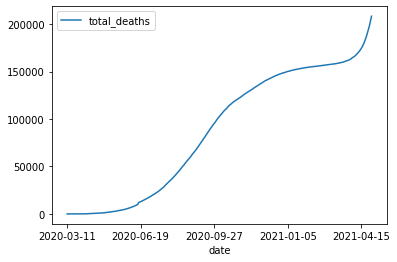

In [26]:
df.plot(x='date', y='total_deaths')

<AxesSubplot:xlabel='date'>

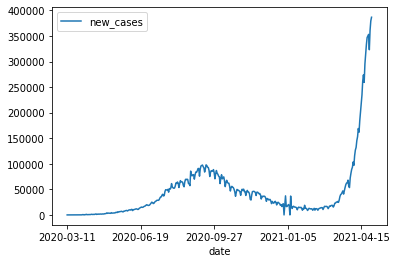

In [27]:
df.plot(x='date', y='new_cases')

<AxesSubplot:xlabel='date'>

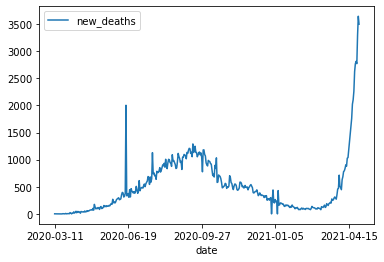

In [28]:
df.plot(x='date', y='new_deaths')

We can very clearly see from these plots that cases and deaths have been skyrocketing starting around late March to early April 2021. This is when a new strain of the virus came to India. But what made this new strain so difficult to handle compared to any previous ones, and is the situation different by state in India?